In [1]:
import io
from collections import Counter
from pathlib import Path

import numpy as np
import pymupdf

from deep_statutes.config import STATUTES_DATA_DIR
from deep_statutes.pdf.util import iter_spans

from IPython.display import SVG

In [2]:
path = Path(STATUTES_DATA_DIR) / "us/pdf/usc11@119-4.pdf"
out_path = None

In [3]:
doc = pymupdf.open(path)

In [4]:
def span_font(span):
    """Get the font of a span."""
    font = span["font"]
    size = round(span["size"], 1)
    font_s = f"{font} {size}"
    return font_s


font_counter = Counter()

for page in doc:
    for _, span in iter_spans(page):
        font = span_font(span)
        text = span["text"].strip()
        # replace all whitespace in text with a singel space
        text = " ".join(text.split())
        font_counter[font] += len(text)


# sort the fonts by the number of characters
counts = font_counter.most_common()

for font, count in counts:
    print(f'Font: "{font}", Count: {count}')

Font: "Times-Roman 11.0", Count: 1241429
Font: "Times-Roman 12.0", Count: 820920
Font: "Times-Bold 11.0", Count: 49064
Font: "Times-Bold 14.0", Count: 12666
Font: "Times-BoldItalic 10.0", Count: 11697
Font: "Times-Italic 11.0", Count: 3312
Font: "Times-Italic 12.0", Count: 2412
Font: "Times-Bold 12.0", Count: 394
Font: "Times-Roman 12.6", Count: 346
Font: "Times-Roman 10.8", Count: 128
Font: "Times-Roman 10.0", Count: 91
Font: "Times-Italic 10.0", Count: 48
Font: "Times-Roman 9.6", Count: 45
Font: "Times-Bold 24.0", Count: 19
Font: "Times-Roman 9.1", Count: 6
Font: "Times-Bold 10.0", Count: 1


In [5]:
fonts = np.array([f for f, _ in counts[::-1]])
count = np.array([c for _, c in counts[::-1]])

# figure out fonts that are no more than 5% of the document

cum_count = np.cumsum(count)

percentage = cum_count / cum_count[-1]
keep_fonts = fonts[percentage <= 0.05]



In [6]:
# get text, but only for the keep fonts
s = io.StringIO()
for page in doc:
    for _, span in iter_spans(page):
        font = span_font(span)
        text = span['text'].strip()
        # replace all whitespace in text with a single space
        text = ' '.join(text.split())
        if font in keep_fonts:
            s.write(text)
            s.write('\n\n')

print(s.getvalue())

1501

Ancillary and Other Cross-Border Cases

15.

1301

Adjustment of Debts of an Individual With Regular Income

13.

1201

Adjustments of Debts of a Family Farmer or Family Fisherman with Regular

Annual Income

1

12.

1101

Reorganization

11.

901

Adjustment of Debts of a Municipality

9.

701

Liquidation

7.

501

Creditors, the Debtor, and the Estate

5.

301

Case Administration

3.

101

General Provisions

1.

Sec.

Chap.

TITLE 11—BANKRUPTCY

This title was enacted by Pub. L. 95–598, title I, §101, Nov. 6, 1978, 92 Stat. 2549

EDITORIAL NOTES

AMENDMENTS

2005

1994

1986

TABLE I

This Table lists the sections of former Title 11,

Bankruptcy, and indicates the sections of Title 11,

as revised by Pub. L. 95–598 which cover similar

and related subject matter.

Title 11

Former Sections

Title 11

New Sections

[Release Point 119-4]

[Release Point 119-4]

l

[Release Point 119-4]

l

l

[Release Point 119-4]

[Release Point 119-4]

l

o

[Release Point 119-4]

[Release P

In [7]:
d0 = doc[0].get_text('dict')
width = d0['width']
height = d0['height']

out_doc = pymupdf.open()

for page in doc:
    text_writer = pymupdf.TextWriter(page.rect)
    for _, span in iter_spans(page):
        bbox = span['bbox']
        x0, y1 = bbox[0], bbox[3]
        font = span_font(span)
        text = span['text']
        if font in keep_fonts:
            is_bold = 'bold' in font.lower()
            is_italic = 'italic' in font.lower()
            f = pymupdf.Font(span['font'], is_bold=is_bold, is_italic=is_italic)
            text_writer.append((x0, y1), text, font=f, fontsize=span['size'])

    _, _, width, height = page.rect
    out_page = out_doc.new_page(width=width, height=height)
    text_writer.write_text(out_page)

if out_path is not None:
    out_doc.save(out_path)

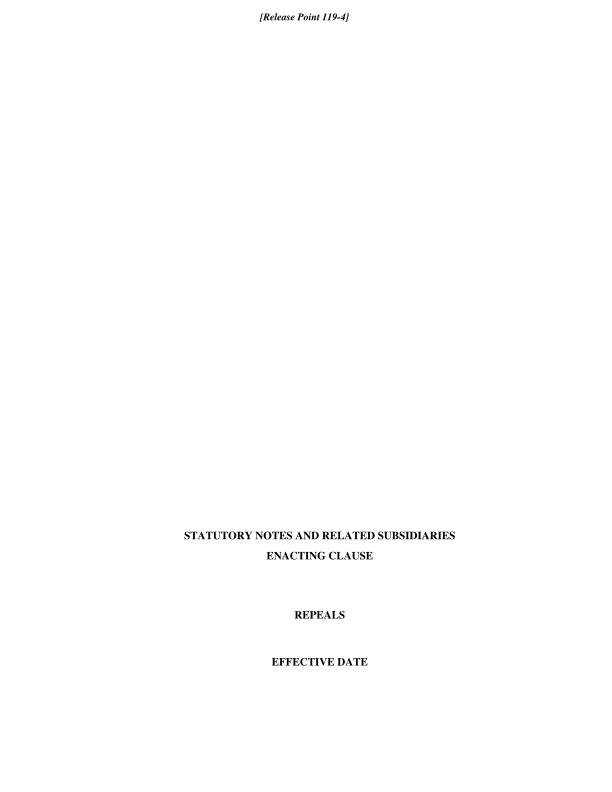

In [8]:
SVG(out_doc[23].get_svg_image())